In [152]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm as class_svm
from sklearn import  preprocessing
from sklearn.neural_network import MLPClassifier as mlp
from sklearn.metrics import precision_recall_fscore_support, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import time
from scipy.stats import normaltest

In [67]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
   
    if not title:
        if normalize:
            title = 'Matriz de Confusão normalizada'
        else:
            title = 'Matriz de Confusão NÃO normalizada'

    # calcula  a matriz de confusão
    cm = confusion_matrix(y_true, y_pred)
    
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Matriz de Confusão normalizada")
    else:
        print('Matriz de Confusão NÃO normalizada')

    #print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ...criando os labels
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='Entrada',
           xlabel='Saida')

    # rotacionando os labels
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Percorrendo sobre os dados e criando as anotações de texto
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [68]:
def getClassificadorSVM(x_treino, y_treino, kernel='linear', C=0.01, gamma='scale'):
    # C = parâmetro de rugalirazação (default = 1.0)
    # gamma = parâmetro para rbf, poly e sigmoid
    # degree é apenas para kernel='poly' e seu default é 3 (está indicado apenas por indicar mesmo)
    classificador = class_svm.SVC(kernel=kernel, C=C, gamma=gamma, degree=3)
    classificador.fit(x_treino, y_treino)
    return classificador

In [87]:
def getClassificadorMLP(x_treino, y_treino, solver="adam", alpha=0.0001):    
    classificador = mlp(solver=solver, alpha=alpha)
    classificador.fit(x_treino, y_treino)
    return classificador

In [88]:
def getClassificadorKNeighbors(x_treino, y_treino):
    classificador = KNeighborsClassifier()
    classificador.fit(x_treino, y_treino)
    return classificador

In [118]:
def imprimirValidacaoCruzada(classificador, x_teste, y_teste, cv=5):
    scores = cross_val_score(classificador, x_teste, y_teste, cv=cv)
    print('--- Validação Cruzada ---')
    print('Acurácia: %.5f (+/- %.5f)' % (scores.mean(), scores.std() * 2))

In [81]:
def mostrarResultadosPrecisao(classificador, x_teste, y_teste, classes):
    y_pred = classificador.predict(x_teste)
    np.set_printoptions(precision=2)
    print('Score: ', classificador.score(x_teste, y_teste))
    plot_confusion_matrix(y_teste, y_pred, classes=np.array(classes),title='Matriz de Confusão')
    plt.show()
    print(classification_report(y_teste,y_pred))
    precisao=100*accuracy_score(y_teste,y_pred)
    print(f'Precisão do modelo: {precisao:.3f} %')
    imprimirValidacaoCruzada(classificador, x_teste, y_teste)
    

In [21]:
df = pd.read_csv('../Pratica 8/weatherHistory.csv', header=0)
print(df.columns)
df.head(3)

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')


,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.


In [31]:
df_limpo = df[pd.isnull(df['Precip Type']) == False]

In [156]:
df_limpo['Summary'].unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

c:\users\freitas\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


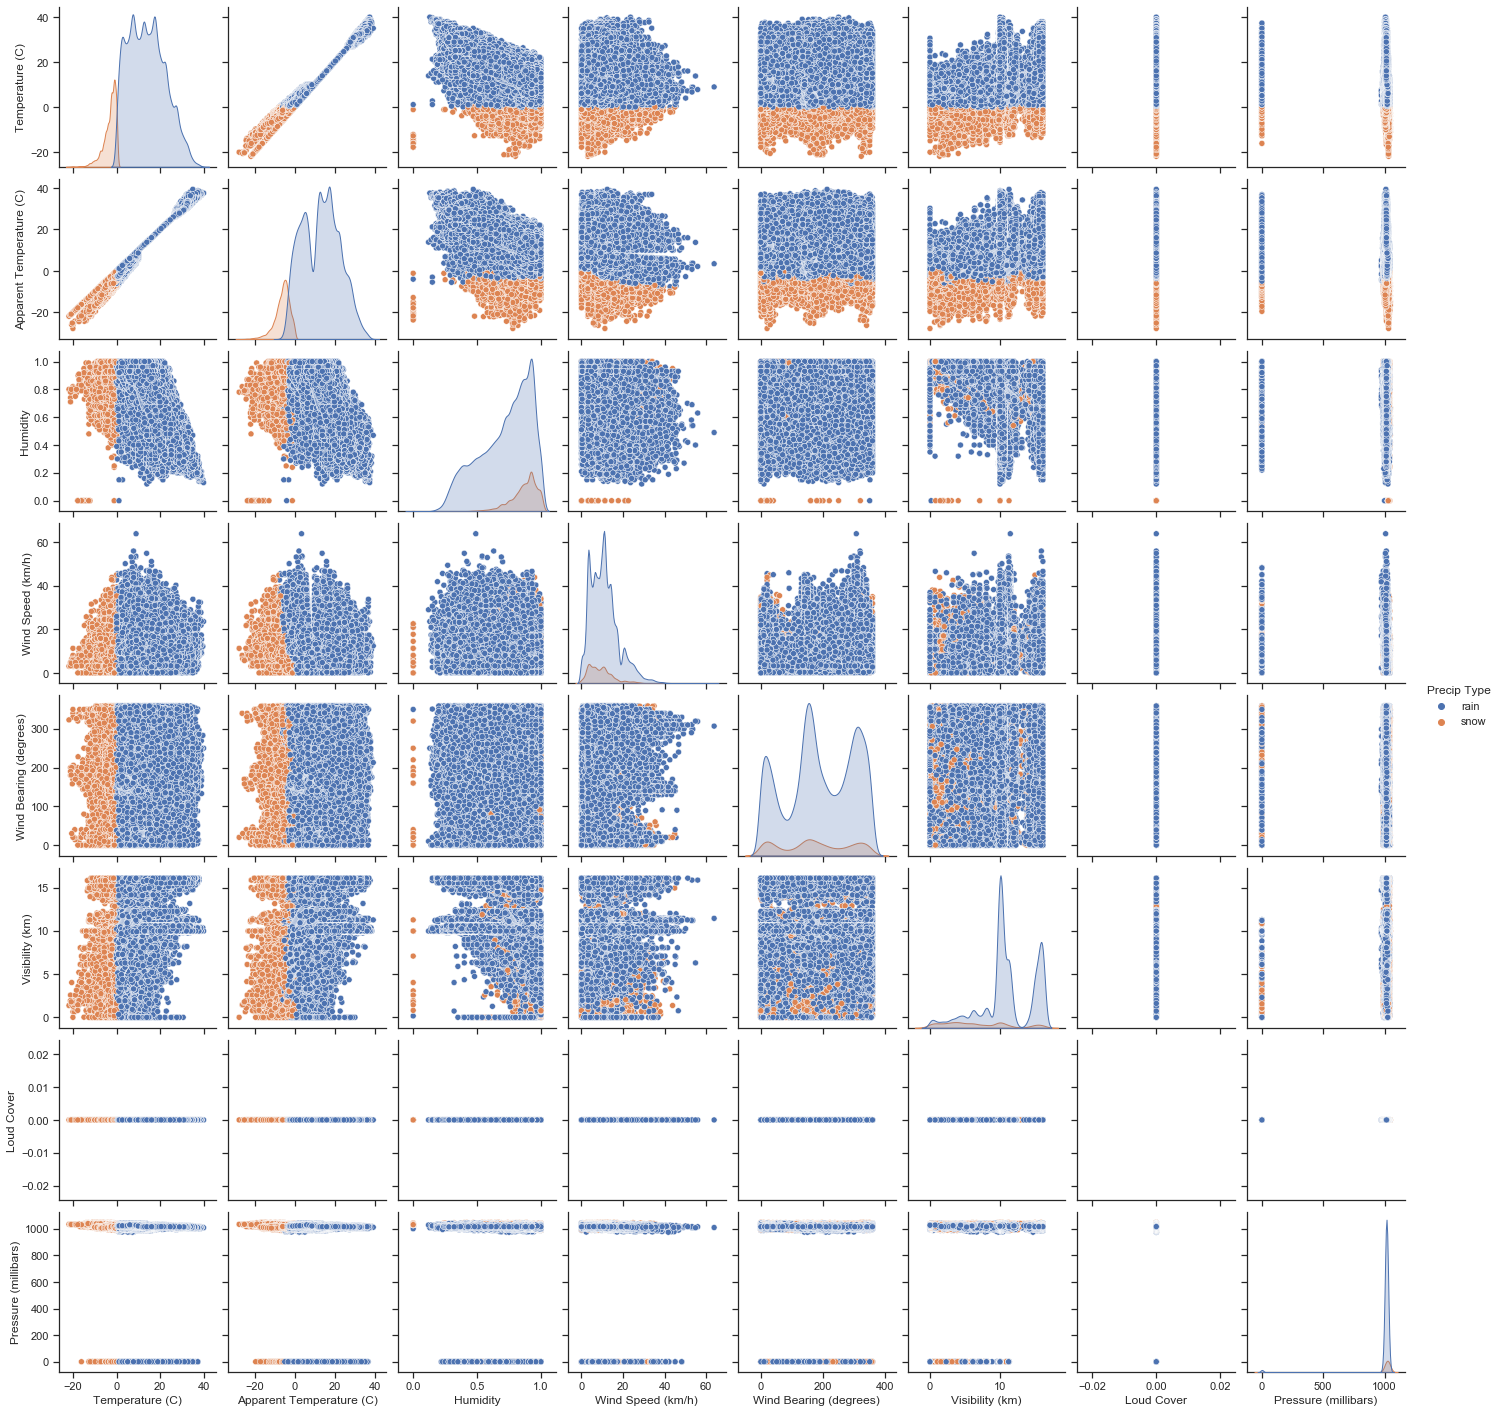

In [23]:
sns.set(style='ticks')
sns.pairplot(df_limpo, hue='Precip Type')
plt.show()

In [46]:
dfl = df_limpo
dfl = dfl[['Apparent Temperature (C)', 
        'Humidity', 
        'Wind Speed (km/h)',
        'Wind Bearing (degrees)', 
        'Visibility (km)', 
        'Pressure (millibars)', 
        'Precip Type']]
print(dfl['Precip Type'].unique())
dfl.head(3)

['rain' 'snow']


,Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Precip Type
0,7.388889,0.89,14.1197,251.0,15.8263,1015.13,rain
1,7.227778,0.86,14.2646,259.0,15.8263,1015.63,rain
2,9.377778,0.89,3.9284,204.0,14.9569,1015.94,rain


In [72]:
data = dfl[['Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)', 'Wind Bearing (degrees)',  'Visibility (km)', 
        'Pressure (millibars)']]
precips = dfl['Precip Type'].unique()
labels = np.where(dfl['Precip Type']=='rain', 0, 1)
classes = np.unique(labels)
classes

array([0, 1])

In [62]:
#dividindo o pacote de dados em treino e teste
test_size = 0.25
x_treino, x_teste, y_treino, y_teste = train_test_split(data, labels, random_state=0, test_size=test_size)
x_treino = preprocessing.scale(x_treino) # scaling...
x_teste = preprocessing.scale(x_teste)
print('Test size: ' + str(test_size))

Test size: 0.25


In [133]:
x_treino

array([[ 0.19,  0.18, -0.04, -0.53,  1.31,  0.14],
       [-2.19,  1.15, -0.68, -0.69, -1.86,  0.29],
       [-1.86,  1.1 , -0.69, -1.07, -1.42,  0.22],
       ...,
       [ 0.25,  0.54,  0.03, -1.74, -0.08,  0.1 ],
       [ 0.63,  0.9 ,  0.03, -0.64, -0.8 , -0.05],
       [-1.29, -2.98,  2.87, -1.74, -0.03,  0.14]])

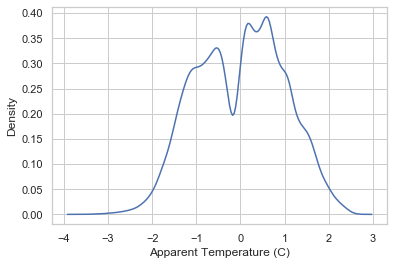

Normal Test: (statistic, p-value) = NormaltestResult(statistic=4072.337557118656, pvalue=0.0)
alpha = 0.05
Os valores NÃO seguem uma distribuição normal.


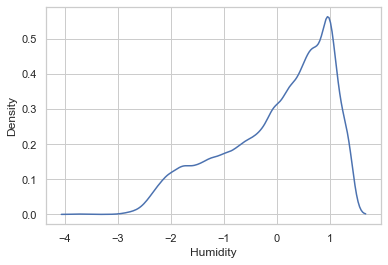

Normal Test: (statistic, p-value) = NormaltestResult(statistic=6186.542808357438, pvalue=0.0)
alpha = 0.05
Os valores NÃO seguem uma distribuição normal.


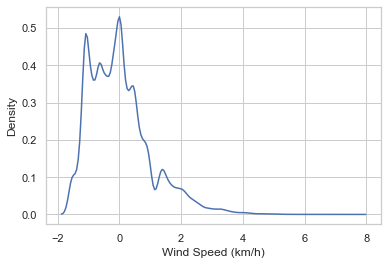

Normal Test: (statistic, p-value) = NormaltestResult(statistic=13097.643662324866, pvalue=0.0)
alpha = 0.05
Os valores NÃO seguem uma distribuição normal.


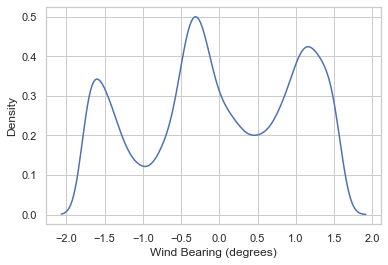

Normal Test: (statistic, p-value) = NormaltestResult(statistic=37974.42564434732, pvalue=0.0)
alpha = 0.05
Os valores NÃO seguem uma distribuição normal.


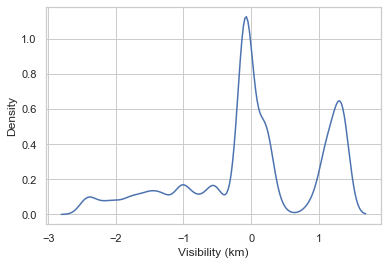

Normal Test: (statistic, p-value) = NormaltestResult(statistic=2910.990782816387, pvalue=0.0)
alpha = 0.05
Os valores NÃO seguem uma distribuição normal.


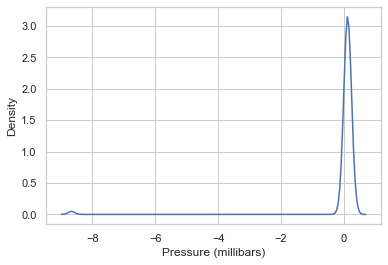

Normal Test: (statistic, p-value) = NormaltestResult(statistic=99854.99722173203, pvalue=0.0)
alpha = 0.05
Os valores NÃO seguem uma distribuição normal.


In [155]:
sns.set_style('whitegrid')
for k in range(0, len(x_treino[0])):
    sns.kdeplot(np.array(x_treino[:,k]))
    plt.xlabel(dfl.columns[k])
    plt.show()
    nt = normaltest(x_treino[:,k])
    print("Normal Test: (statistic, p-value) = {}".format(nt))
    k2, p = nt
    #alpha = 1e-3
    alpha = 0.05
    print('alpha = 0.05')
    if p < alpha:  # null hypothesis: x comes from a normal distribution
        print("Os valores NÃO seguem uma distribuição normal.")
    else:
        print("Os valores seguem uma distribuição normal.")

<h3>Classificador SVM, kernel linear</h3>

In [119]:
t0 = time.time()
classificador_svm = getClassificadorSVM(x_treino, y_treino, kernel='linear', C=1.0, gamma='scale')
print('Tempo decorrido: %.2f segundos' % (time.time() - t0))

Tempo decorrido: 3.96 segundos


Score:  0.9861157438292195
Matriz de Confusão NÃO normalizada


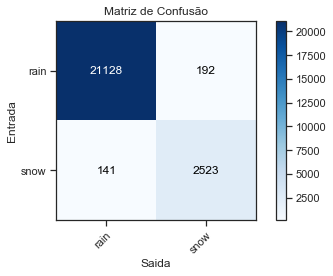

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     21320
           1       0.93      0.95      0.94      2664

    accuracy                           0.99     23984
   macro avg       0.96      0.97      0.97     23984
weighted avg       0.99      0.99      0.99     23984

Precisão do modelo: 98.612 %
--- Validação Cruzada ---
Acurácia: 0.98653 (+/- 0.00217)
Tempo decorrido: 2.83 segundos


In [120]:
t0 = time.time()
mostrarResultadosPrecisao(classificador_svm, x_teste, y_teste, np.unique(precips))
print('Tempo decorrido: %.2f segundos' % (time.time() - t0))

<h3>Classificador MLP, solver adam</h3>

In [121]:
t0 = time.time()
classificador_mlp = getClassificadorMLP(x_treino, y_treino, solver="adam", alpha=0.0001)
print('Tempo decorrido: %.2f segundos' % (time.time() - t0))

Tempo decorrido: 43.23 segundos


Score:  0.9932038025350234
Matriz de Confusão NÃO normalizada


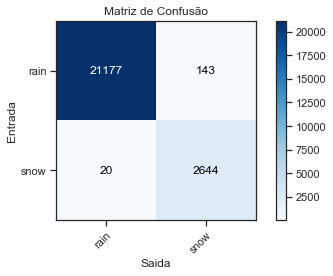

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     21320
           1       0.95      0.99      0.97      2664

    accuracy                           0.99     23984
   macro avg       0.97      0.99      0.98     23984
weighted avg       0.99      0.99      0.99     23984

Precisão do modelo: 99.320 %
--- Validação Cruzada ---
Acurácia: 0.99191 (+/- 0.00252)
Tempo decorrido: 113.82 segundos


In [122]:
t0 = time.time()
mostrarResultadosPrecisao(classificador_mlp, x_teste, y_teste, np.unique(precips))
print('Tempo decorrido: %.2f segundos' % (time.time() - t0))

<h3>Classificador KNeighbors</h3>

In [123]:
t0 = time.time()
classificador_kneighbors = getClassificadorKNeighbors(x_treino, y_treino)
print('Tempo decorrido: %.2f segundos' % (time.time() - t0))

Tempo decorrido: 0.21 segundos


Score:  0.9833222148098733
Matriz de Confusão NÃO normalizada


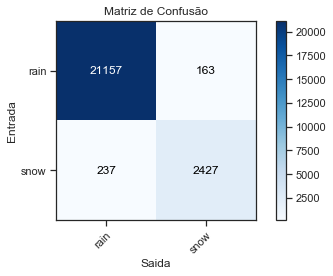

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     21320
           1       0.94      0.91      0.92      2664

    accuracy                           0.98     23984
   macro avg       0.96      0.95      0.96     23984
weighted avg       0.98      0.98      0.98     23984

Precisão do modelo: 98.332 %
--- Validação Cruzada ---
Acurácia: 0.97740 (+/- 0.00485)
Tempo decorrido: 7.92 segundos


In [124]:
t0 = time.time()
mostrarResultadosPrecisao(classificador_kneighbors, x_teste, y_teste, np.unique(precips))
print('Tempo decorrido: %.2f segundos' % (time.time() - t0))

<h3>Respostas:</h3>
<p><b>a)</b> A acurácia, precisão e revocação para cada rótulo estão indicados nos resultados acima. Três classificadores foram utilizados: SVM (kernel linear), MLP (solver adam) e KNeighbors. O algoritmo com melhores resultados foi o MLP, com uma acurácia de 99,26% +/- 0.27%.</p>
<p><b>b)</b> Em relação a esta questão, eu não havia implementado considerando-se todos os campos possíveis. Foram utilizados apenas os campos que mostravam alguma relação significativa em relação aos rótulos no <i>pairplot</i> do <i>seaborn</i>. De fato, restringir tais valores melhoram os resultados, mas restringir mais ainda, acredito que não irá melhorar, pois com menos características, o modelo fica mais suscetível a decisões erradas. Em contrapartida, com mais características disponíveis, o modelo demora mais para ser gerado, porém tem uma chance de conseguir classificar melhor os dados.</p>
<p><b>c)</b> O classificador MLP demorou mais tempo, cerca de 43 segundos, enquanto que os classificadores SVM e KNeighbors foram mais rápidos, sendo que este último foi o mais rápido de todos, demorando menos de 1 segundo.</p>
<p><b>d)</b> As matrizes de confusão para os resultados foram mostrados junto a eles.</p>